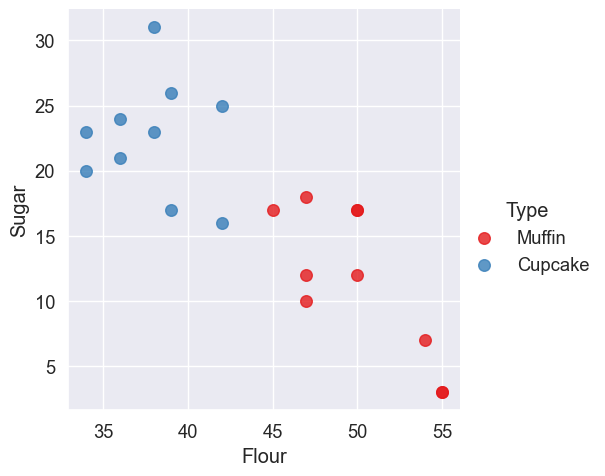

In [1]:
import numpy as np  # array calc..
import pandas as pd # dataframes

from sklearn import svm

#visulize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#%matplotlib inline
recipes= pd.read_csv('Cupcakes vs Muffins.csv')
# print(recipes.head())

# plot our data

sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


In [7]:
#format or prespross our data

type_label= np.where(recipes['Type']=='Muffin',0,1)
recipes_features= recipes.columns.values[1:].tolist()
recipes_features
ingredients= recipes[['Flour','Sugar']].values

# ingredients= recipes[recipes_features].values

ingredients

#fit model
model= svm.SVC(kernel='linear')
model.fit(ingredients,type_label)



SVC(kernel='linear')

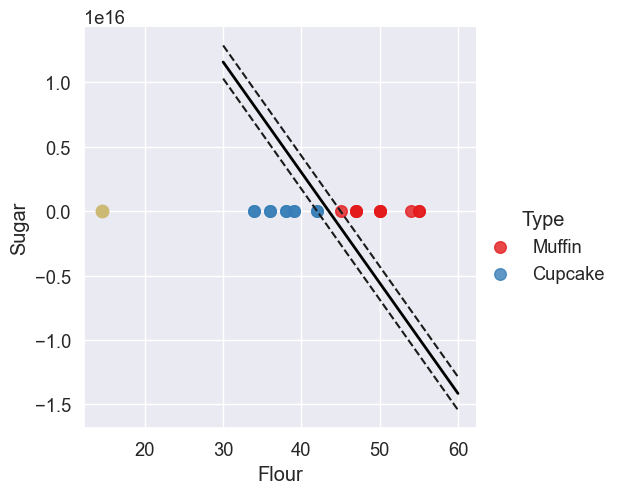

In [18]:
w= model.coef_[0]
a= -w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]

#plot the parallels
b= model.support_vectors_[0]
yy_down= a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up= a*xx+(b[1]-a*b[0])

sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx,yy,linewidth=2, color='black')

plt.plot(xx,yy_down,'k--')

plt.plot(xx,yy_up,'k--')
plt.plot(14.5,80,'yo', markersize='9')

In [16]:
#create func to know whether it is cupcake for muffin
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

muffin_or_cupcake(14.5,80)        
              

You're looking at a cupcake recipe!
